# Shapes

In [9]:
from shapes.data import ShapeDataset
import numpy as np

In [2]:
dataset = ShapeDataset(
    N=50,
    t=100,
    balance=False,
    h_batch=100,
    predict_ahead=1,
    receptive_field=20,
)

torch.Size([50, 1, 100])
torch.Size([50, 1, 100])
torch.Size([50, 1, 1])
Dimension of X :  torch.Size([50, 1, 100])
Dimension of Y :  torch.Size([50, 1, 100])


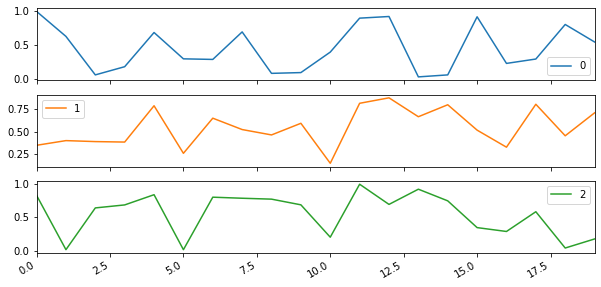

In [4]:
dataset.plot_examples()

In [7]:
from scipy import signal

In [22]:
N = 50
t = 100

array([ 1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,
        1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,
        1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,
        1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1., -1., -1.])

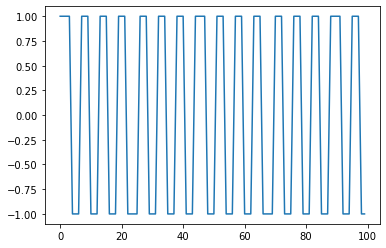

In [26]:
x = np.linspace(0, t, t, endpoint=False)
#saw = signal.sawtooth(x)
square = signal.square(x)
plt.plot(x, square)
#plt.ylim(-2, 2)
square

(-2, 2)

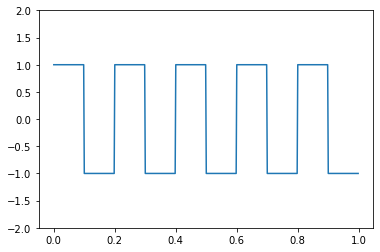

In [18]:
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)

In [17]:
np.linspace(0, t, t, endpoint=False)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])